<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the dataset into a dataframe.


In [85]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [86]:
print(df['ConvertedComp'].isna().sum())
df['ConvertedComp'].dropna(axis=0,inplace=True)
df['ConvertedComp'] = df['ConvertedComp'].fillna(value=0)
print(df['ConvertedComp'].isna().sum())
print(df.shape)

816
0
(11398, 85)


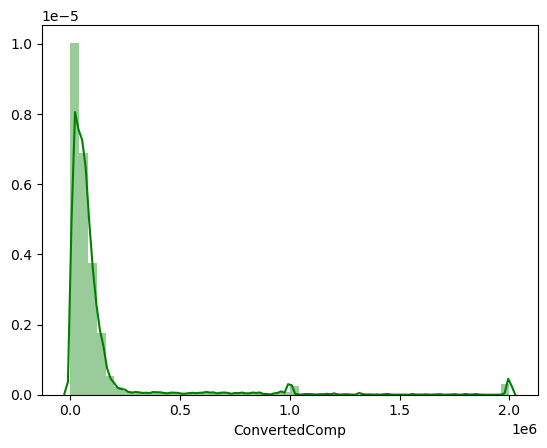

In [88]:
# your code goes here

import seaborn as sns
sns.distplot(df['ConvertedComp'], kde = True, hist=True, color="g")
plt.show()


Plot the histogram for the column `ConvertedComp`.


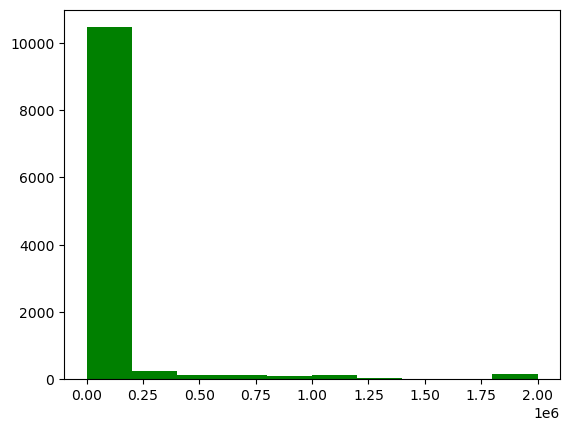

In [89]:
# your code goes here

import matplotlib as mpl
%matplotlib inline 

plt.hist(df['ConvertedComp'], histtype="bar", align="mid", orientation="vertical", rwidth=None, color="g") 
plt.show()

What is the median of the column `ConvertedComp`?


In [90]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
print("ConvertedComp Median:", df['ConvertedComp'].median())

ConvertedComp Median: 53250.0


How many responders identified themselves only as a **Man**?


In [91]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [92]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
print("Median of Converted Compensation for Gender 'Woman' is :", df_woman['ConvertedComp'].median())

Median of Converted Compensation for Gender 'Woman' is : 54000.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [93]:
# your code goes here
df['Age'].describe(include='All')

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


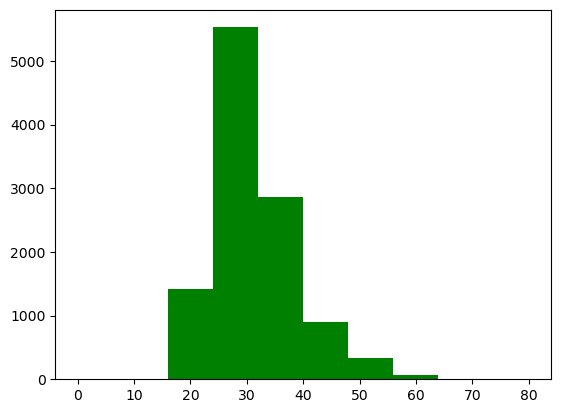

In [94]:
# your code goes here
plt.hist(df['Age'], histtype="bar", align="mid", orientation="vertical", range=(0,80), rwidth=None, color="g") 
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


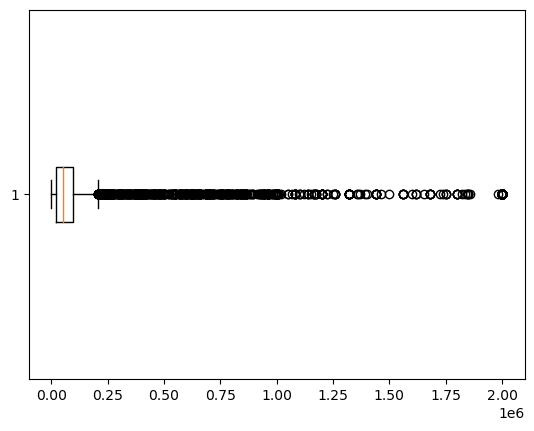

In [96]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
plt.boxplot(df['ConvertedComp'],vert=False)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [97]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
Q1 = df['ConvertedComp'].quantile(.25)
Q3 = df['ConvertedComp'].quantile(.75)
Inter_Quartile_Range = (Q3 - Q1)
print('The Inter Quartile Range for ConvertedComp:', Inter_Quartile_Range)

The Inter Quartile Range for ConvertedComp: 75332.0


Find out the upper and lower bounds.


In [98]:
# your code goes here
upper_limit = Q3+(Inter_Quartile_Range*1.5)
lower_limit = Q1-(Inter_Quartile_Range*1.5)

print('Upper Bound:', upper_limit)
print('Lower Bound:', lower_limit)

Upper Bound: 207998.0
Lower Bound: -93330.0


Identify how many outliers are there in the `ConvertedComp` column.


In [99]:
# your code goes here
df_outliers = (df['ConvertedComp'] < lower_limit) | (df['ConvertedComp'] > upper_limit)
df_outliers 

0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [104]:
# your code goes here
df_new = df['ConvertedComp'].clip(upper_limit, lower_limit)
df_new.describe()

count     11398.000000
mean      67018.306106
std       59167.271171
min           0.000000
25%       19668.000000
50%       53250.000000
75%       95000.000000
max      207998.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [109]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002745,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001026,0.003510,0.007063,0.006970
ConvertedComp,0.002745,0.001026,1.000000,0.020271,-0.037393,0.104135
WorkWeekHrs,-0.015314,0.003510,0.020271,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.037393,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.104135,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
